In [10]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("C:\\Users\\hardi\\OneDrive - wipro\\Desktop\\datasets\\netflix_titles.csv" , encoding='latin1')

In [23]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


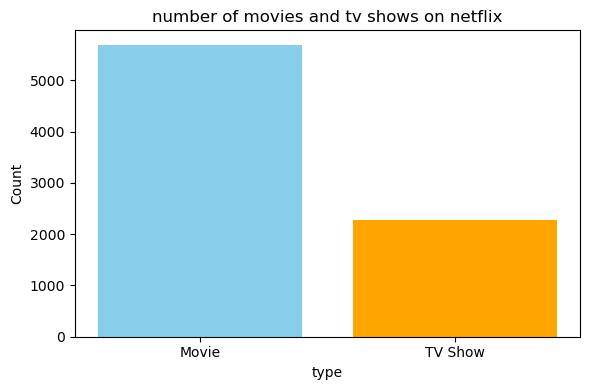

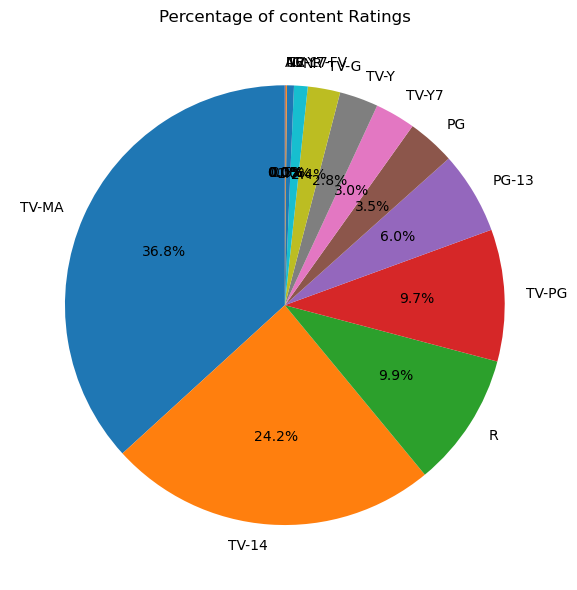

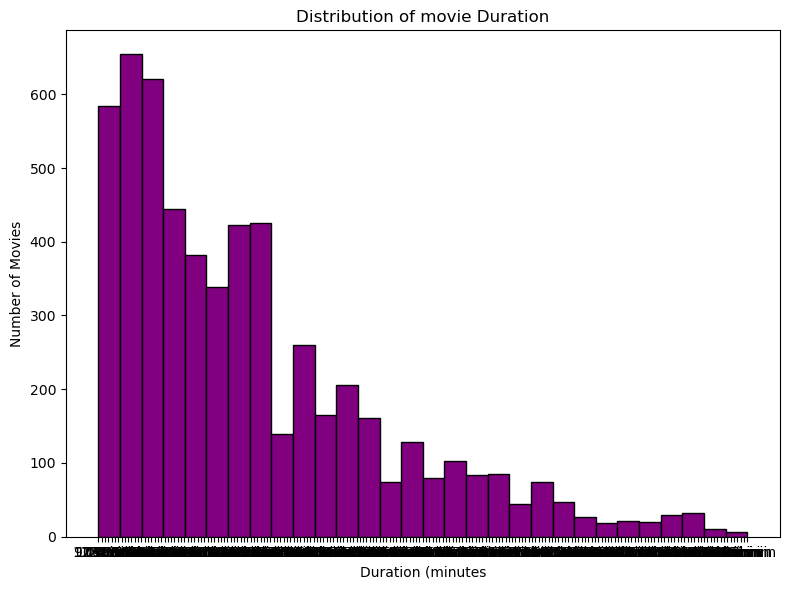

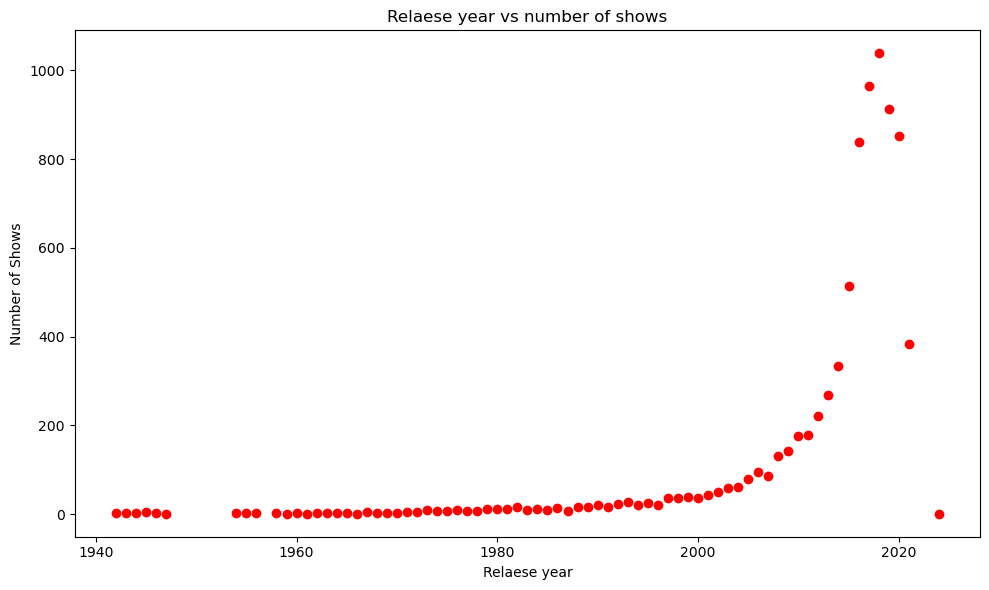

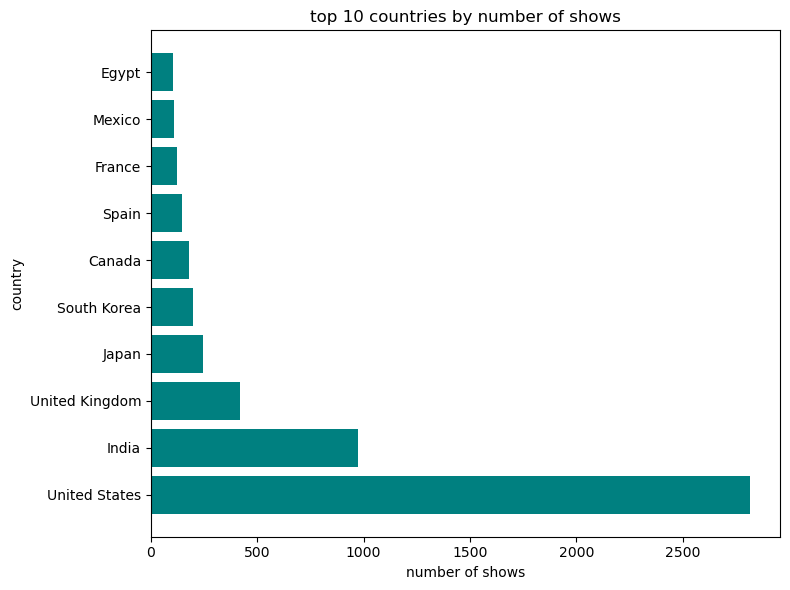

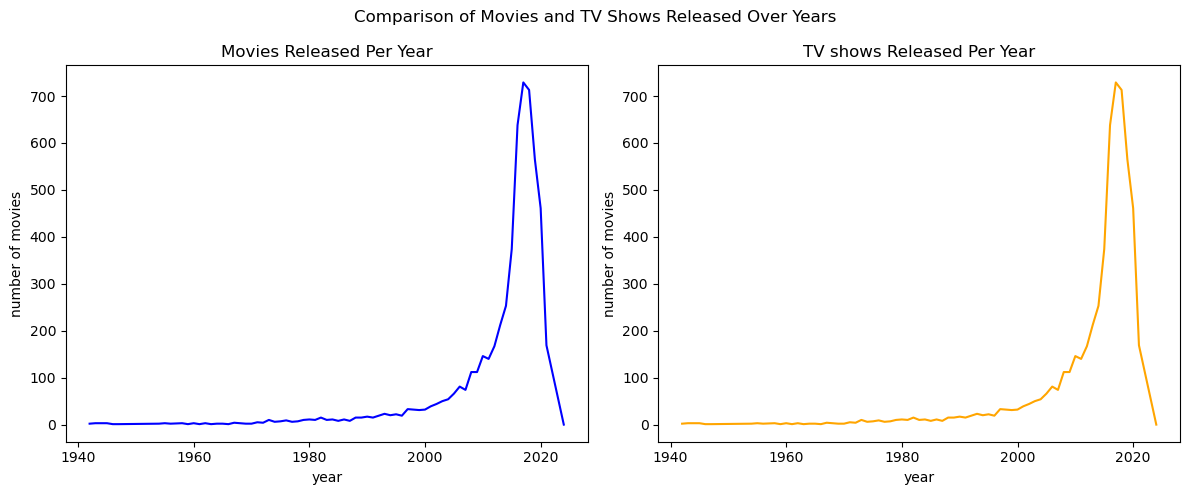

In [70]:
df = df.dropna(subset = {'type' , 'release_year' , 'rating' , 'country' , 'duration'})

type_counts = df['type'].value_counts()
plt.figure(figsize = (6,4))
plt.bar(type_counts.index, type_counts.values , color = ['skyblue' , 'orange'] )
plt.title('number of movies and tv shows on netflix')
plt.xlabel('type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig ('movies_vs_tvshows.png')
plt.show()


rating_counts = df['rating'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(rating_counts , labels = rating_counts.index,autopct='%1.1f%%' ,startangle = 90)
plt.title('Percentage of content Ratings')
plt.tight_layout()
plt.savefig('content_ratiings_pie.png')
plt.show()


movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration'] , bins =30 , color = 'purple' , edgecolor='black')
plt.title('Distribution of movie Duration')
plt.xlabel('Duration (minutes')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig ('movies_duration_hist.png')
plt.show()

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize = (10,6))
plt.scatter(release_counts.index , release_counts.values, color= 'red')
plt.title('Relaese year vs number of shows')
plt.xlabel('Relaese year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig ('scatter.png')
plt.show()


country_counts = df['country'].value_counts().head(10)
plt.figure(figsize = (8,6))
plt.barh(country_counts.index , country_counts.values , color = 'teal')
plt.title('top 10 countries by number of shows')
plt.xlabel('number of shows')
plt.ylabel('country')
plt.tight_layout()
plt.savefig ('country.png')
plt.show()

content_by_year = df.groupby(['release_year' , 'type']).size().unstack().fillna(0)

fig , ax = plt.subplots(1,2 , figsize = (12,5))

#first subplot
ax[0].plot(content_by_year.index , content_by_year['Movie'] , color = 'blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('number of movies')

# second subplot

ax[1].plot(content_by_year.index , content_by_year['Movie'] , color = 'orange')
ax[1].set_title('TV shows Released Per Year')
ax[1].set_xlabel('year')
ax[1].set_ylabel('number of movies')

fig.suptitle('Comparison of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_com.png')
plt.show()

🌀 startangle=90
Rotates the pie chart starting from 90 degrees (i.e., from the top).

By default, the pie chart starts from the right (0°). 90° makes it more readable and centered from the top.